# Applied Statistics – Problems

## Problem 1: Extending the Lady Tasting Tea

In this problem I simulate an extended version of the Lady Tasting Tea experiment.  
The original version uses 8 cups (4 tea-first and 4 milk-first).  
The extended version uses 12 cups (8 tea-first and 4 milk-first).

The idea is simple:
1. create the true order of cups  
2. shuffle them many times using NumPy  
3. count how often the shuffle matches the real order  

This estimates the chance of someone getting everything correct by guessing.

### Imports
Using NumPy for shuffling the cup labels.

In [10]:
import numpy as np  # NumPy docs: https://numpy.org/doc/
np.random.seed(42)  # keep results the same when running again

### Original experiment (8 cups)
There are 4 tea-first and 4 milk-first cups.  
I check how often a random shuffle matches the true order exactly.

In [11]:
labels_8 = np.array(["T"]*4 + ["M"]*4)

trials = 100000
correct_8 = 0

for _ in range(trials):
    guess = np.random.permutation(labels_8)
    if np.array_equal(guess, labels_8):
        correct_8 += 1

prob_8 = correct_8 / trials
prob_8

0.01459

### Extended experiment (12 cups)
Now there are 8 tea-first and 4 milk-first cups.  
Repeating the same simulation with the larger setup.

In [12]:
labels_12 = np.array(["T"]*8 + ["M"]*4)

correct_12 = 0

for _ in range(trials):
    guess = np.random.permutation(labels_12)
    if np.array_equal(guess, labels_12):
        correct_12 += 1

prob_12 = correct_12 / trials
prob_12

0.00201

### Showing both probabilities together
This makes the comparison easier.

In [13]:
print("Estimated probability (8 cups):", prob_8)
print("Estimated probability (12 cups):", prob_12)

Estimated probability (8 cups): 0.01459
Estimated probability (12 cups): 0.00201


### Interpretation

- The 8-cup experiment already has a small probability of being correct by guessing.  
- The 12-cup version is even harder and has an even smaller chance.  
- Because of that, if someone gets all 12 correct, it gives stronger evidence against guessing.  
- This means the p-value threshold could be more relaxed, since the experiment is naturally more demanding.

Overall, the 12-cup design makes random success extremely unlikely.

## Problem 2: Normal Distribution

In this problem I look at the standard deviation of many small samples from the standard normal distribution.

I will:
1. generate 100,000 samples, each of size 10, from a N(0, 1) distribution  
2. compute the standard deviation of each sample with:
   - ddof=0 (population-style SD)
   - ddof=1 (sample SD)
3. plot both sets of SD values on the same histogram  
4. describe what I see and think about what happens if the sample size increases

Here I import NumPy for the simulation and matplotlib for plotting.

In [14]:
import numpy as np  # https://numpy.org/doc/
import matplotlib.pyplot as plt  # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

np.random.seed(42)  # keep results reproducible

### Generating the samples

I generate 100,000 samples, each of size 10, from the standard normal distribution (mean 0, sd 1).  
I store them in a 2D array where each row is one sample.

In [15]:
n_samples = 100_000
sample_size = 10

# rows = samples, columns = observations in each sample
samples = np.random.normal(loc=0, scale=1, size=(n_samples, sample_size))

samples.shape

(100000, 10)

### Computing standard deviations

For each sample (each row), I compute:
- the SD with ddof=0 (population version)
- the SD with ddof=1 (sample version)

Both are based on the same data, but ddof=1 divides by (n-1), which usually makes it a bit larger for small n.

In [16]:
# population-style SD (ddof=0)
sd_ddof0 = np.std(samples, axis=1, ddof=0)

# sample SD (ddof=1)
sd_ddof1 = np.std(samples, axis=1, ddof=1)

sd_ddof0[:5], sd_ddof1[:5]

(array([0.68590593, 0.71656397, 0.77213125, 1.08646497, 0.85439043]),
 array([0.72300833, 0.75532475, 0.8138978 , 1.14523464, 0.90060658]))

### Quick check of the average SD values

Here I check the mean of both sets of SDs.  
We expect both to be close to 1 (true SD of N(0,1)), but the ddof=1 SDs should be slightly larger on average.

In [17]:
print("Mean SD with ddof=0:", sd_ddof0.mean())
print("Mean SD with ddof=1:", sd_ddof1.mean())

Mean SD with ddof=0: 0.9227768047619614
Mean SD with ddof=1: 0.9726921583401028


### Plotting the histograms

Now I plot both distributions of SD values on the same axes with some transparency.  
This should show how often each SD value occurs for the two definitions.

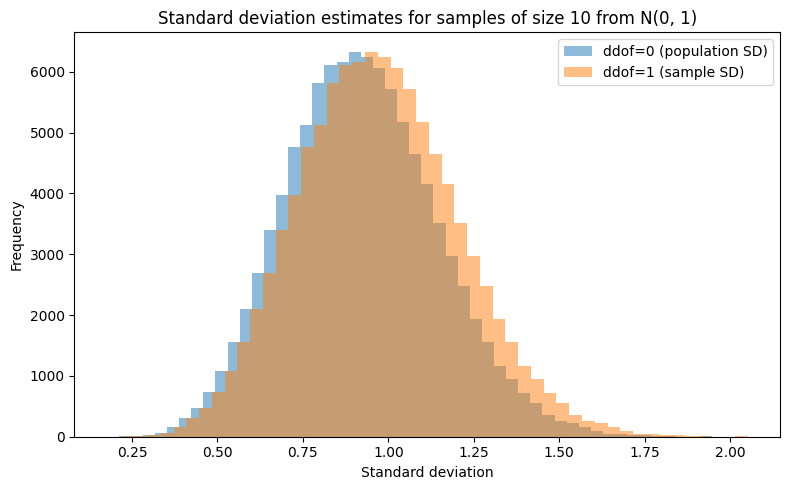

In [18]:
plt.figure(figsize=(8, 5))

plt.hist(sd_ddof0, bins=50, alpha=0.5, label="ddof=0 (population SD)")
plt.hist(sd_ddof1, bins=50, alpha=0.5, label="ddof=1 (sample SD)")

plt.xlabel("Standard deviation")
plt.ylabel("Frequency")
plt.title("Standard deviation estimates for samples of size 10 from N(0, 1)")
plt.legend()
plt.tight_layout()
plt.show()

### Description of the differences

From the plot and the mean values:

- Both histograms are centred around 1, which makes sense because the true SD of the standard normal distribution is 1.
- The ddof=1 (sample SD) histogram is slightly shifted to the right compared to the ddof=0 one.
- This means that, for samples of size 10, the sample SD (ddof=1) tends to be a bit larger on average than the ddof=0 version.

This matches the idea that ddof=1 is meant to correct for bias when estimating the population standard deviation from a finite sample.

### What happens if we increase the sample size?

If we increase the sample size (for example from 10 to 30 or 100), I would expect:

- Both distributions of SD values to become **narrower** (less spread), because larger samples give more stable estimates.
- Both sets of SDs to be **more tightly clustered around 1**, the true standard deviation.
- The difference between ddof=0 and ddof=1 to become **smaller and less visible** in the histograms.

So with larger sample sizes, the two histograms would overlap more and look almost the same, because the effect of using n vs (n−1) in the denominator becomes less important.